>>>on python 3.11.9

## Step0: Pre-reg

Since we use ipynb we can not directly use opencv methods to show frames we need to prepare a ipynb suitable frame shower.

In [43]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image as PILImage

from IPython.display import Image, display, clear_output
import time
import numpy as np

Video to Array 

In [44]:
def video2array(path:str):
    """return bgr format as it easier to use on opencv"""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Cannot open video.")
    else:
        frames = [] 
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("End of video.")
            break
        frames.append(frame)

    cap.release()
    return frames

In [45]:
def displayFromArray(source,limit=0):
    """lim 0 means unlimited if you give a value it stops at that lim"""
    limitCounter=0
    for frame in source:
        limitCounter+=1
        # Convert the frame from BGR to RGB for proper display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame
        clear_output(wait=True)  # Clear the previous frame
        display(PILImage.fromarray(frame_rgb))  # Display the current frame
        if limitCounter==limit: # if lim 0 it wont be work so limit 0 means unlimited
            break
       

In [46]:
video_path = "..\\vidResources\\176kmShort.mp4"
testArray=video2array(video_path)
len(testArray)

End of video.


145

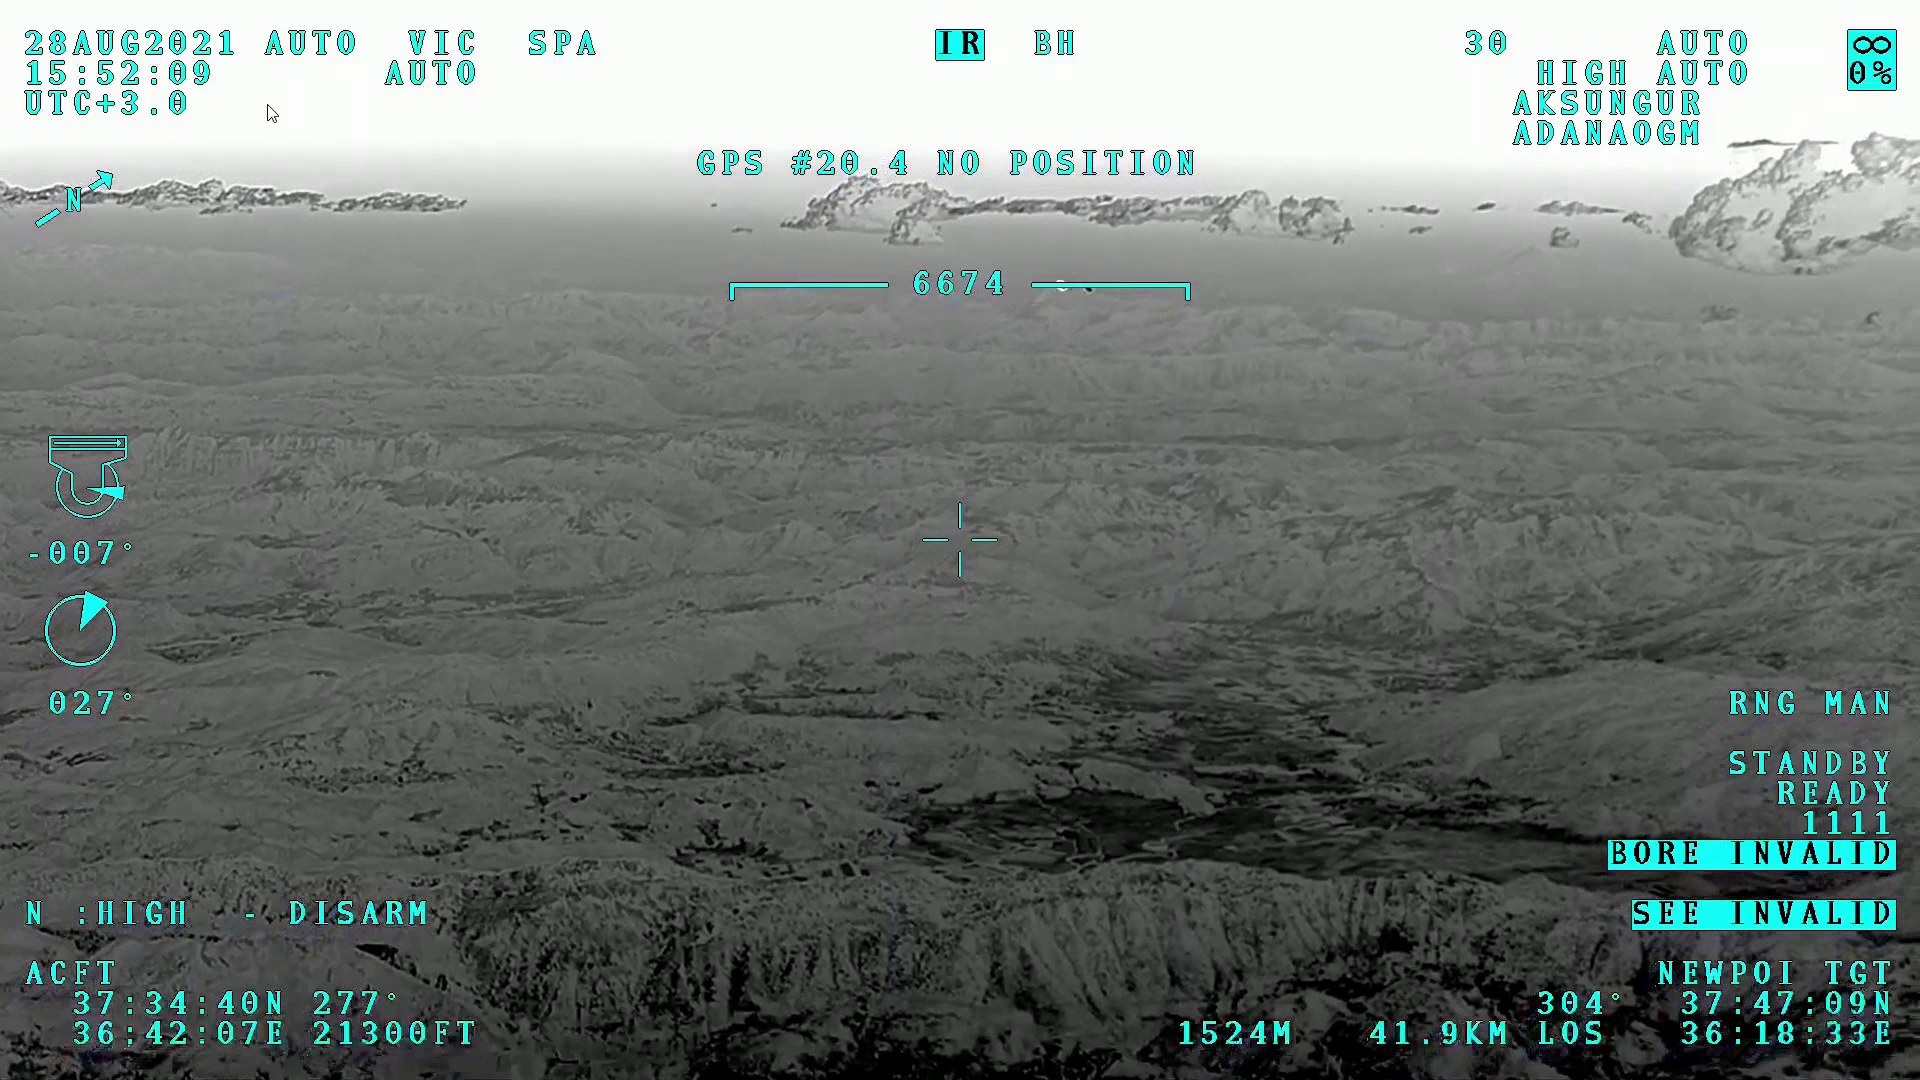

In [47]:
displayFromArray(testArray,limit=15)

In [48]:
def is_grayscale_strict(frame):
    """
    Check if a frame is grayscale by comparing color channels.

    Args:
        frame (np.ndarray): Image to check.

    Returns:
        bool: True if the image is grayscale, False otherwise.
    """
    if len(frame.shape) == 2:  # Grayscale image with one channel
        return True
    elif frame.shape[2] == 3:  # Color image with three channels
        # Check if all channels are identical
        return np.array_equal(frame[:, :, 0], frame[:, :, 1]) and np.array_equal(frame[:, :, 1], frame[:, :, 2])
    return False

In [49]:
is_grayscale_strict(testArray[1])

False

Step 1 Using OpenCV to detect Fire 

In [56]:
smoke_rgb = "..\\importantScenes\\kozansonRGB.png"
kozan_ir_black = "..\\importantScenes\\kozansonIR1.png"
kozan_ir_white = "..\\importantScenes\\kozansonIR2.png"

important_scenes=[cv2.imread(filename=smoke_rgb),cv2.imread(filename=kozan_ir_black),cv2.imread(filename=kozan_ir_white)]

In [57]:

def showArrayOfImages(arr):
    for frame in arr:
        # Convert BGR (OpenCV default) to RGB for correct color display in Matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(frame_rgb)
        plt.axis('off')  # Hide axes
        plt.show()

        time.sleep(1)  # Pause for 1 second
        clear_output(wait=True)  # Clear output for the next image
   

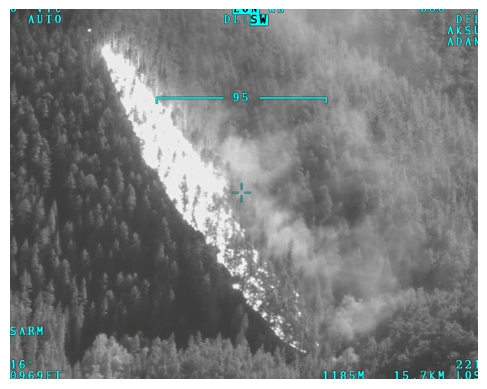

In [60]:
showArrayOfImages(important_scenes)

In [62]:
def detectClumps(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect mostly white clumps
    _, white_thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

    # Detect mostly black clumps
    _, black_thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

    # Optional: Morphological operations to refine the masks
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    white_mask = cv2.morphologyEx(white_thresh, cv2.MORPH_CLOSE, kernel)
    black_mask = cv2.morphologyEx(black_thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours
    white_contours, _ = cv2.findContours(white_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    black_contours, _ = cv2.findContours(black_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours for visualization
    white_result = cv2.drawContours(image.copy(), white_contours, -1, (0, 255, 0), 2)
    black_result = cv2.drawContours(image.copy(), black_contours, -1, (0, 0, 255), 2)
    return white_result,black_result

In [63]:
warry=[]
barry=[]
for img in important_scenes:
    white, black  = detectClumps(img)
    warry.append(white)
    barry.append(black)

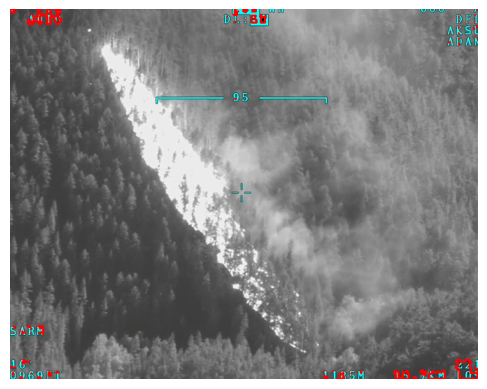

In [64]:
showArrayOfImages(warry)
showArrayOfImages(barry)